In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example of "look elsewhere bias"

using the code below answere and discuss these quesitons

## Questions:  
1. if you run 800 assays, how likley are you to get a 3 sigma result?Would it be fair to publish this?  How would you have to word the result?

2. what if ten groups run the same 80 experiments.   How likley is it for one of these groups will get a 3 sigma result?  How would pulishing the null results help mitigate this risk?

3. if you do a blind search for an event how many channels would you have to consider before you expext to get a ~5 sigma result about half the time

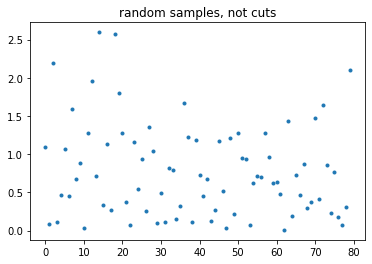

In [247]:
N_samps = 80
x = np.random.randn(N_samps)
y = 20**np.random.exponential(scale = .2, size = N_samps)
y -= np.mean(y[0:int(N_samps/8)])
x=x+y*0
#x=x**2
plt.plot(np.abs(x),".")
plt.title("random samples, not cuts")
plt.show()


# Example of "backround subtraction bias"

Consider an experiment which produces events which have measuremets of the invarient mass.  There is a backgorund that follows an exponential distribtion.    Is there a peak in the mass distribtion?  
## step 1: 
  chooise a normalization for the background level bu addusting the "background_level" pramater.  Do yor best with a fit by eye.


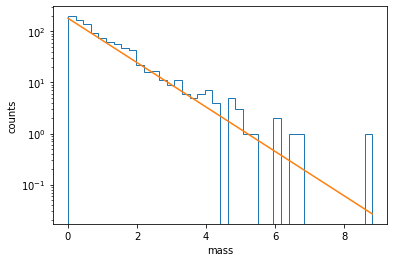

In [240]:
N_samps = 1000
mass = np.random.exponential(scale=1.0, size=N_samps)


##. adjustable paramter
background_level = 180

counts, bins = np.histogram(mass,bins = "auto")
plt.stairs(counts, bins)
plt.plot(bins,background_level*np.exp(-bins))
plt.semilogy()
plt.ylabel("counts")
plt.xlabel("mass")
plt.show()

given this background subtraction, now look to see if you have detected anything.   We will compute the signal as $$S = counts - background $$, and estimate the noise as $$ n = \sqrt{background}$$

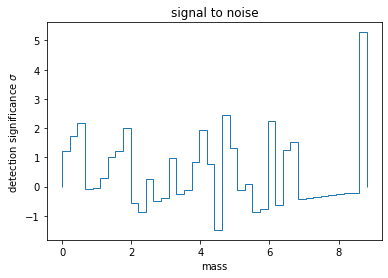

In [241]:
signal = counts - background_level*np.exp(-bins[:-1])
noise = np.sqrt(background_level*np.exp(-bins[:-1]))


plt.stairs(signal/noise, bins)
plt.title("signal to noise")
plt.xlabel("mass")
plt.ylabel("detection significance $\sigma$")
plt.show()


## what about cuts?

It is often the case that the experiment doesn't produce a clean hisogram as its output.  Instead it produces lots of things which must be processed to produce this histogram.  This processing includes data seleciton cuts.  These cuts can result in a number of different types of biases.  

Imagine an experiment measuring the charge and light from events.  The background could produce events with a roughly liear relation ship between charge and light.  The "signal" could produce charge with signficnatly less light.


Quesitons: 

1. How do you define cuts to isolate the signal?  
1. change the red points to balck and ponder how hard this is on real data.
1. What are the pitfalls of over and under cutting
1. How can you avoid these pitfalls?


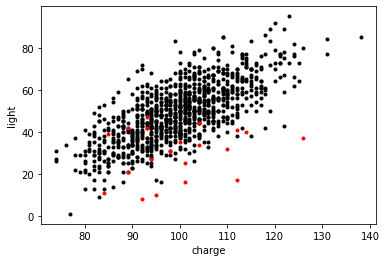

In [243]:
N_samps = 1000
bkgrd_charge = np.random.poisson(100,N_samps)
bkgrd_light = bkgrd_charge + np.random.poisson(100,N_samps)-150

sig_charge = np.random.poisson(100,int(N_samps/50))
sig_light = np.random.poisson(180,int(N_samps/50))-150


plt.plot(bkgrd_charge,bkgrd_light,"k.")
plt.plot(sig_charge,sig_light,"r.")
plt.xlabel("charge")
plt.ylabel("light")
plt.show()

